# Setup

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import os


In [22]:
drive.mount("/content/drive", force_remount=True)
root = "/content/drive/My Drive/Horse Category Classification"
os.chdir(root)
data_root = root + "/data"
data_root_train = data_root + "/train"
data_root_test = data_root + "/test"

Mounted at /content/drive


In [23]:
os.chdir(root+ "/functions")
import exploration

# 01 Data Exploration

### Load Data

In [24]:
BATCH_SIZE = 32
HEIGHT = 224
WIDTH = 224

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    crop_to_aspect_ratio=False
)

Found 458 files belonging to 3 classes.
Using 367 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    crop_to_aspect_ratio=False
)

Found 458 files belonging to 3 classes.
Using 91 files for validation.


In [27]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_test,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=False,
)

Found 117 files belonging to 3 classes.


### Class Distribution

In [28]:
class_names = test_ds.class_names
CLASS_NAMES = class_names
num_classes = len(class_names)

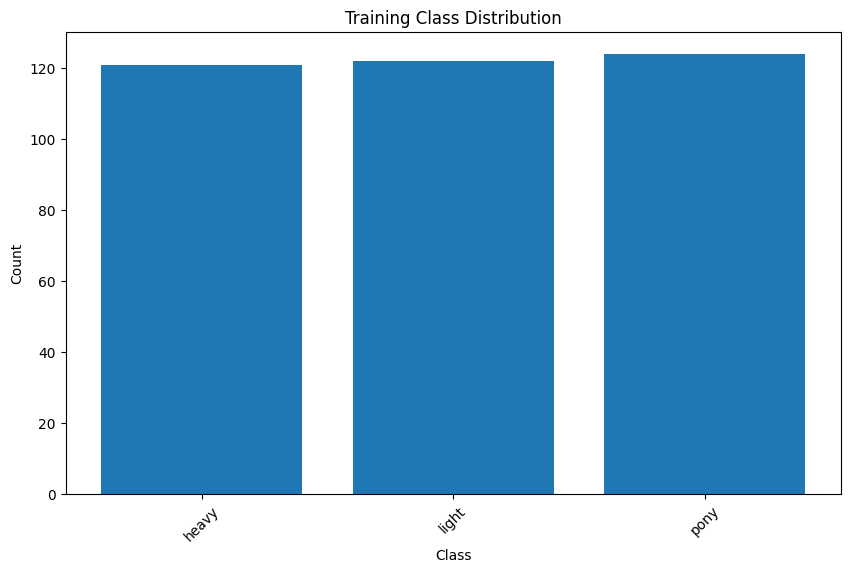

In [29]:
# train distribution
exploration.print_distribution("Training Class Distribution", class_names, train_ds)

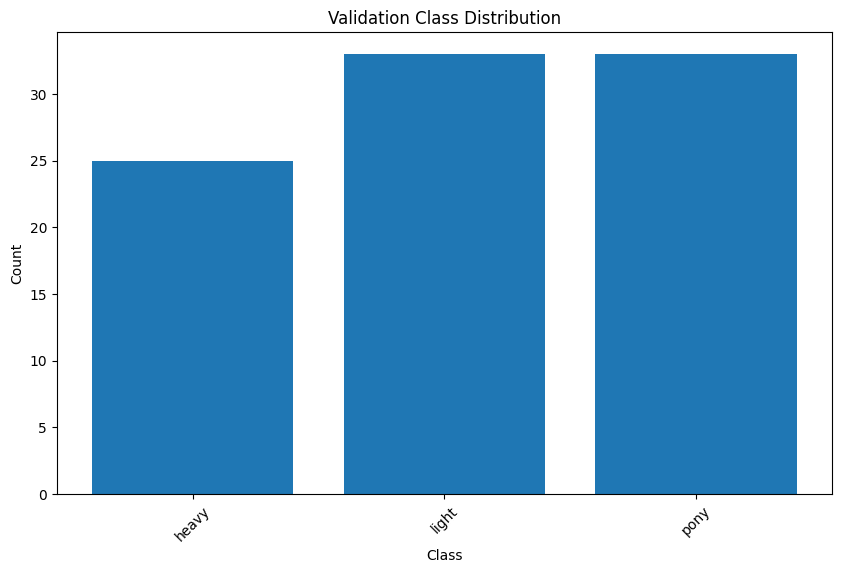

In [30]:
# val distribution
exploration.print_distribution("Validation Class Distribution", class_names, val_ds)

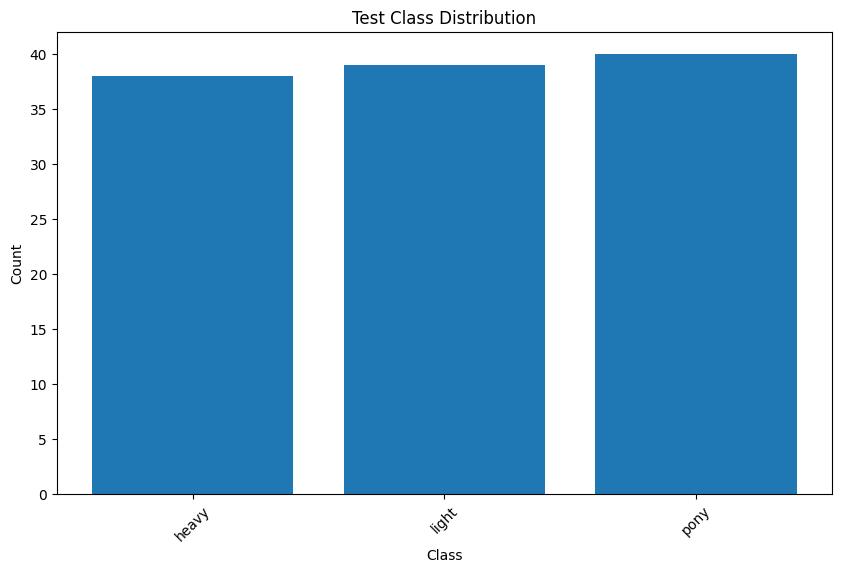

In [31]:
# test distribution
exploration.print_distribution("Test Class Distribution", class_names, test_ds)

### Sneakpeek

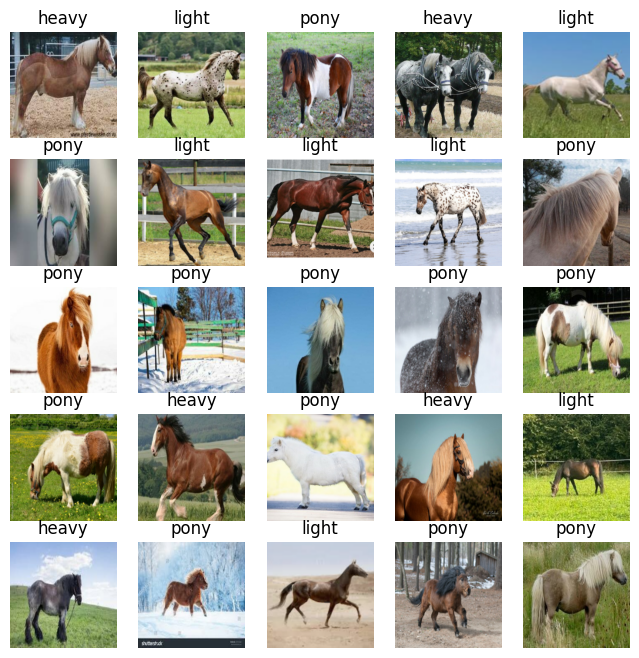

In [32]:
# looking at the training set
exploration.sneak_peek(train_ds, class_names)

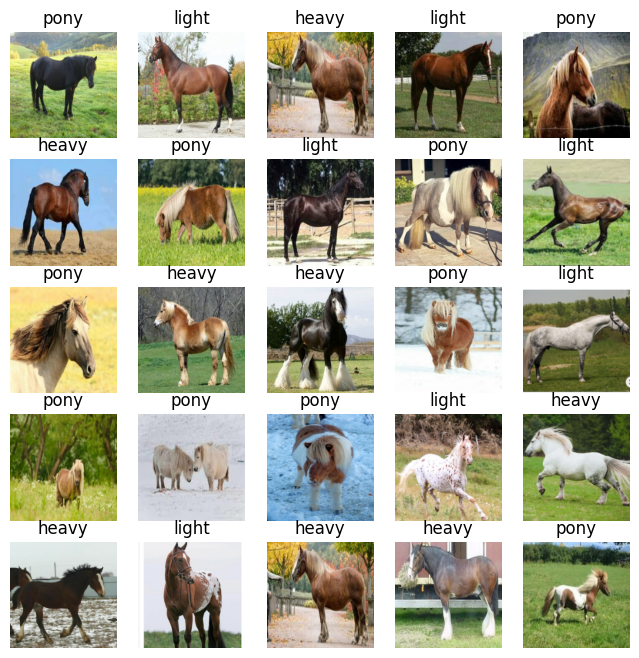

In [33]:
# looking at the validation set
exploration.sneak_peek(val_ds, class_names)

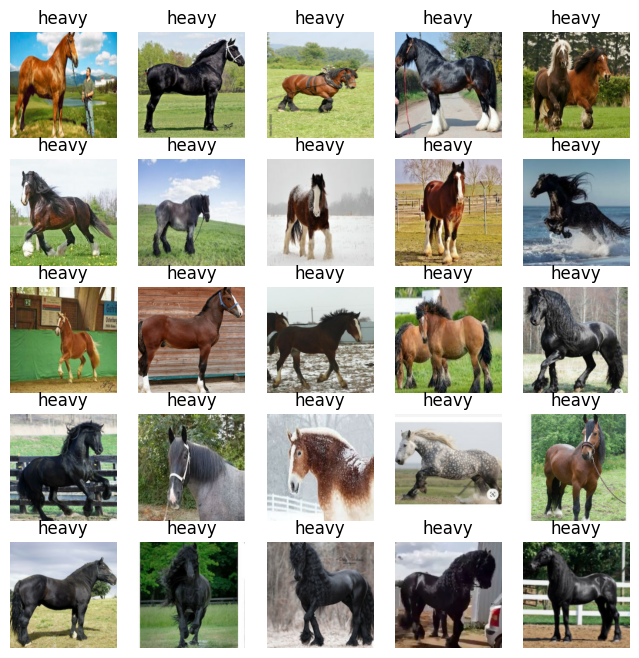

In [34]:
# looking at the test set (shuffling is not active, therefore all from the same category)
exploration.sneak_peek(test_ds, class_names)